
# Model Evaluation and Refinement

Objectives of project:

- Model Evaluation
- Over-fitting, Under-fitting and Model Selection
- Ridge Regression
- Grid Search

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [3]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:

await download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv','module_5_auto.csv')

In [5]:
df = pd.read_csv("module_5_auto.csv", header=0)

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [8]:
#creating df with only numeric data
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [9]:
#removing columns
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Libraries for plotting:


In [10]:
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Functions for Plotting</h2>


In [11]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [12]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Part 1: Training and Testing</h2>

Splitting data into training and testing data. <b>Price</b> will be placed in a separate dataframe <b>y_data</b>:</p>


In [13]:
y_data = df['price']

In [14]:
#dropping price in X_data
x_data=df.drop('price',axis=1)

In [15]:
#splitting data into training and testing data using the function train_test_split.

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.


In [16]:
# splitting up the dataset such that 40% of the data samples will be utilized for testing. 
#the parameter "random_state" equal to zero. The output of the function are: "x_train1" , "x_test1", "y_train1" and "y_test1".

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.40, random_state=0)


print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
#Linear Regression object
lre=LinearRegression()

In [19]:
#fitting the model using the feature "horsepower"
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [20]:
#calculating the R^2 on the test data
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

In [21]:
#R^2 is much smaller using the test data compared to the training data
lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

In [22]:
#Calculating R^2 on the test data using 40% of the dataset for testing
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

<h2>Cross-Validation Score</h2>


In [24]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.


In [25]:
# inputting the object, the feature "horsepower", and the target data (y_data). The parameter 'cv' determines the number of folds.


Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [26]:
#The default scoring is R^2. Each element in the array has the average R^2 value for the fold:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [27]:
#calculating the average and standard deviation of estimate:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220099150421194 and the standard deviation is 0.29118394447560253


In [28]:
#using negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.

-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.26505169, 12539630.34014931,
       17561927.72247589])

## Write your code below and press Shift+Enter to execute 
Rcross2= cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross2

In [31]:
#Calculating the average R^2 using two folds

#finding the average R^2 for the second fold utilizing the "horsepower" feature

Rcross2= cross_val_score(lre, x_data[['horsepower']], y_data, cv=2) 
Rcross2
Rcross2.mean()

0.5166761697127429

In [32]:
from sklearn.model_selection import cross_val_predict

In [33]:
#Another way to predict the output is to use the function 'cross_val_predict'
#(The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training)

yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Part 2: Overfitting, Underfitting and Model Selection


In [36]:
#creating Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [47]:
#Prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244, 16095.58976762,  5493.39946597, 11664.79793006,
        6807.18648404, 16475.73097131, 11900.73825159, 11249.96609558,
        6397.42659407, 21973.85044348, 16810.56839134, 11862.6061902 ,
        9008.87056451, 22619.74131659, 24059.5484705 ,  9018.1261375 ,
       15082.57584248, 18350.42705689, 11105.21810781, 27230.63173951,
       11105.21810781,  5866.69339839,  5899.59841145, 10153.64235711,
       23309.06009275, 13364.54429294, 19047.41293694,  5920.65552212,
       11846.91343671,  7351.3699873 ,  6359.62662523,  7015.65736686,
        7306.64248026, 17320.73044874, 17028.92516735, 10516.44416856,
       29686.45351371,  6753.3796298 ,  6927.73512425,  9564.87373579,
         651.26444019, 14082.75866765,  9708.96012797, 23451.67806289,
        5692.64897207, 22921.32655392, 18452.50074365,  7372.06493124,
       21399.38941488, 14964.81874602,  7498.04911771, 16240.45437519,
      

In [44]:
#Prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282,  6028.29617155, 18958.50000053, 11089.07032063,
       15601.88220834,  5721.82879083, 11345.66966482,  6583.13201976,
       15520.27032615, 17998.82522513, 12280.65732581, 14323.27548395,
        4815.89424884, 17619.42454919,  6534.01322406,  9373.16125193,
        9872.19111955])

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

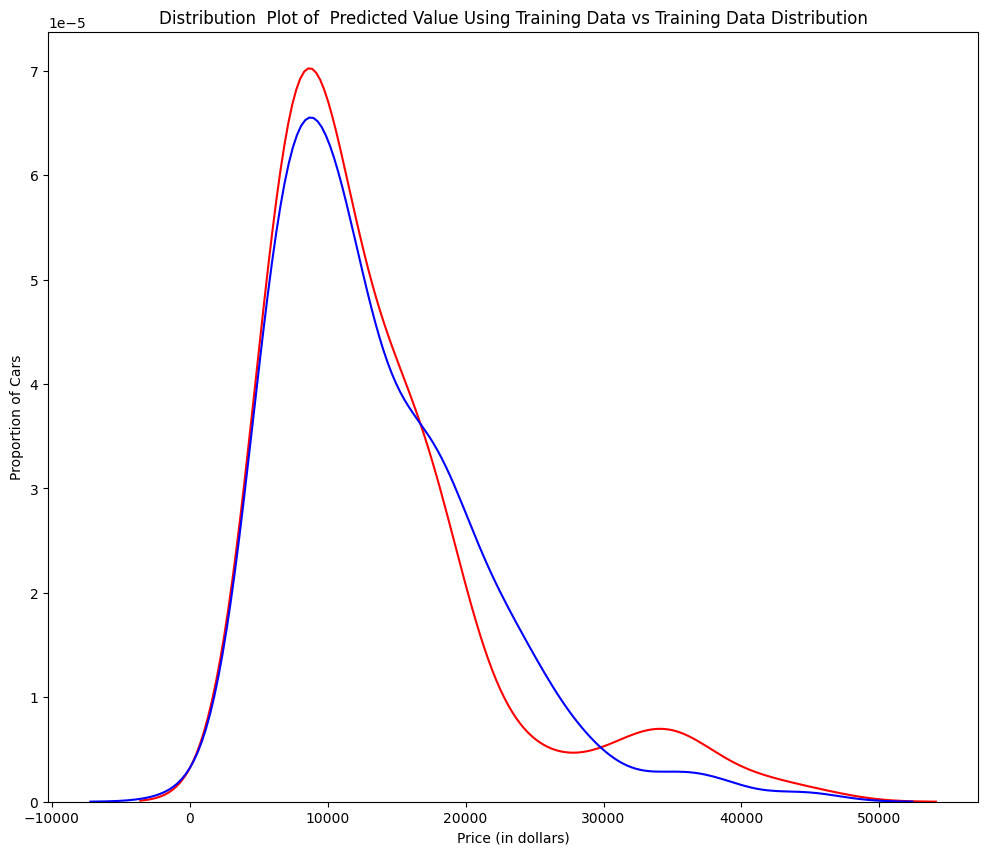

In [42]:
#distribution of the predicted values of the training data.
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data. The model seems to be doing well in learning from the training dataset.


The model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


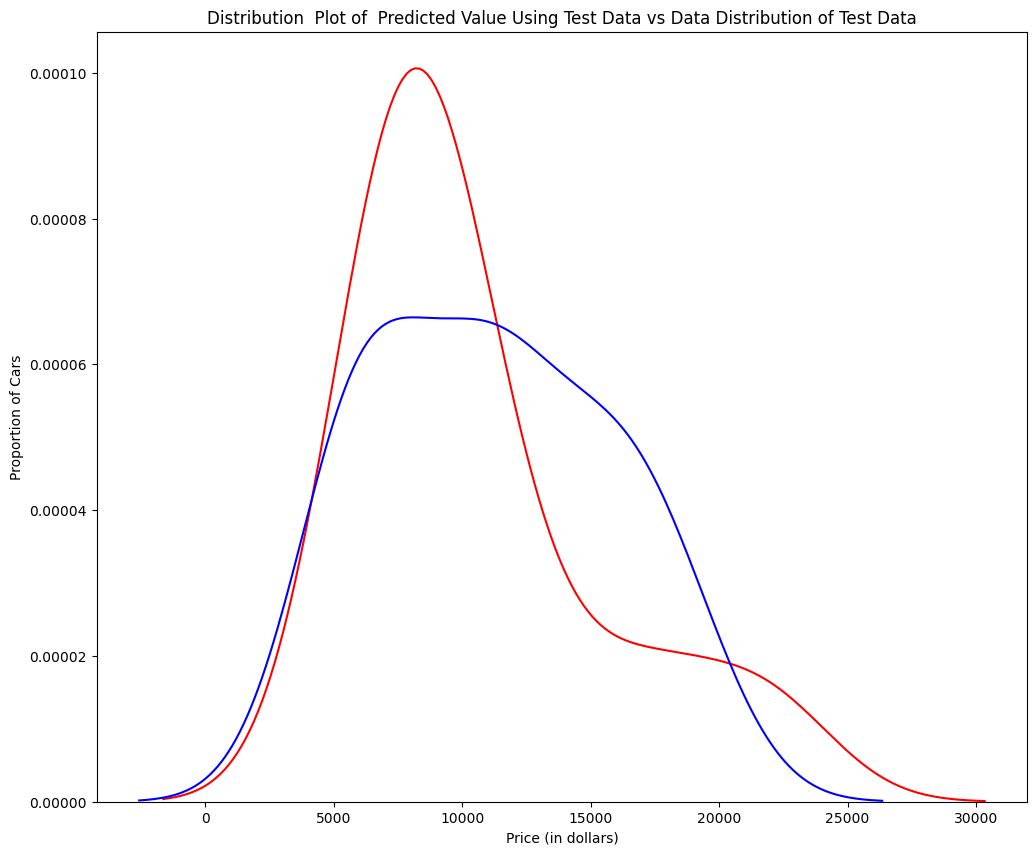

In [45]:
#model encounters new data from the testing dataset.
#he distribution of the predicted values is much different from the actual target values.

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.


<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different.</p>


In [46]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not the underlying process.</p>


In [48]:
#using 55 percent of the data for training and the rest for testing:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [49]:
#performing a degree 5 polynomial transformation on the feature 'horsepower'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [50]:
#creating a Linear Regression model "poly" and training it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [51]:
#checking teh output of teh model
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.63832421,  7307.97117434, 12213.7782297 , 18893.28386921,
       19995.98994044])

Let's take the first five predicted values and compare it to the actual targets.


In [52]:
#comparing the first five predicted values to the actual targets
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.63832421  7307.97117434 12213.7782297  18893.28386921]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


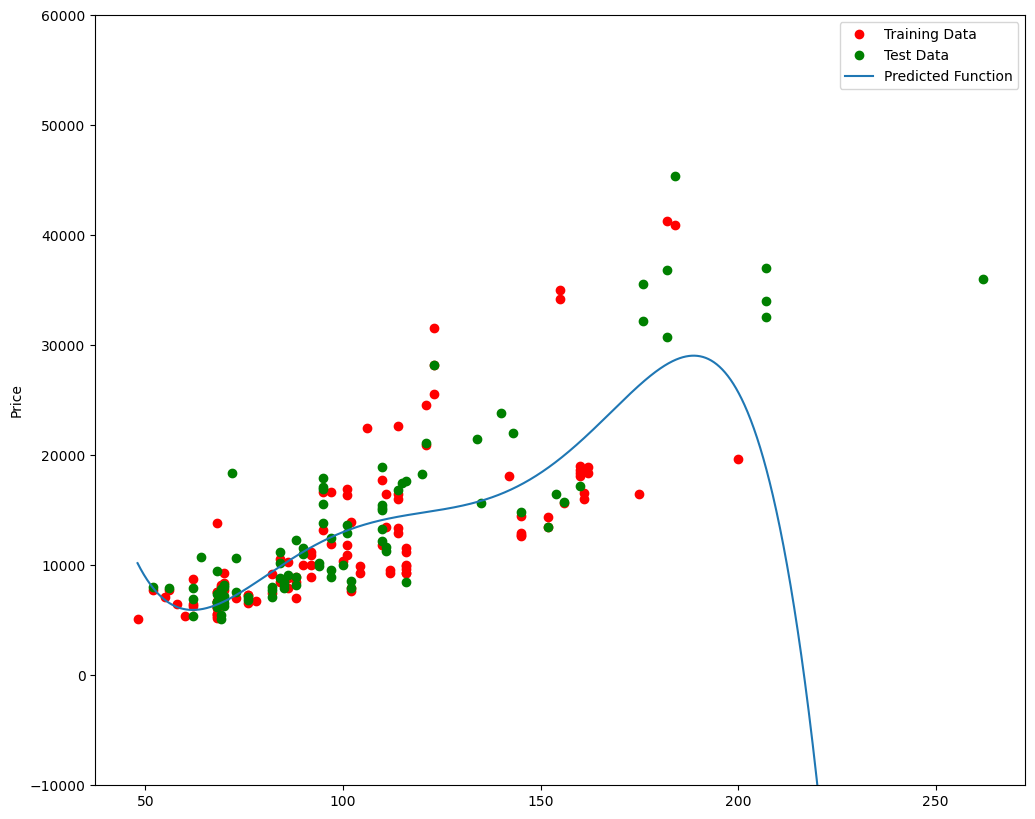

In [53]:
# use the function "PollyPlot" defined before to display the training data, testing data and the predicted function
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


In [54]:
#R^2 of the training data
poly.score(x_train_pr, y_train)

0.5567716901663193

In [55]:
#R^2 of the test data
poly.score(x_test_pr, y_test)

-29.871307705799722

R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Text(3, 0.75, 'Maximum R^2 ')

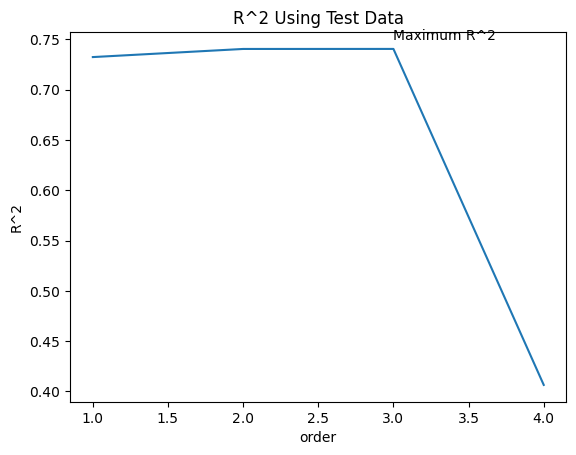

In [56]:
#checking how the R^2 changes on the test data for different order polynomials

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

The R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


In [57]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

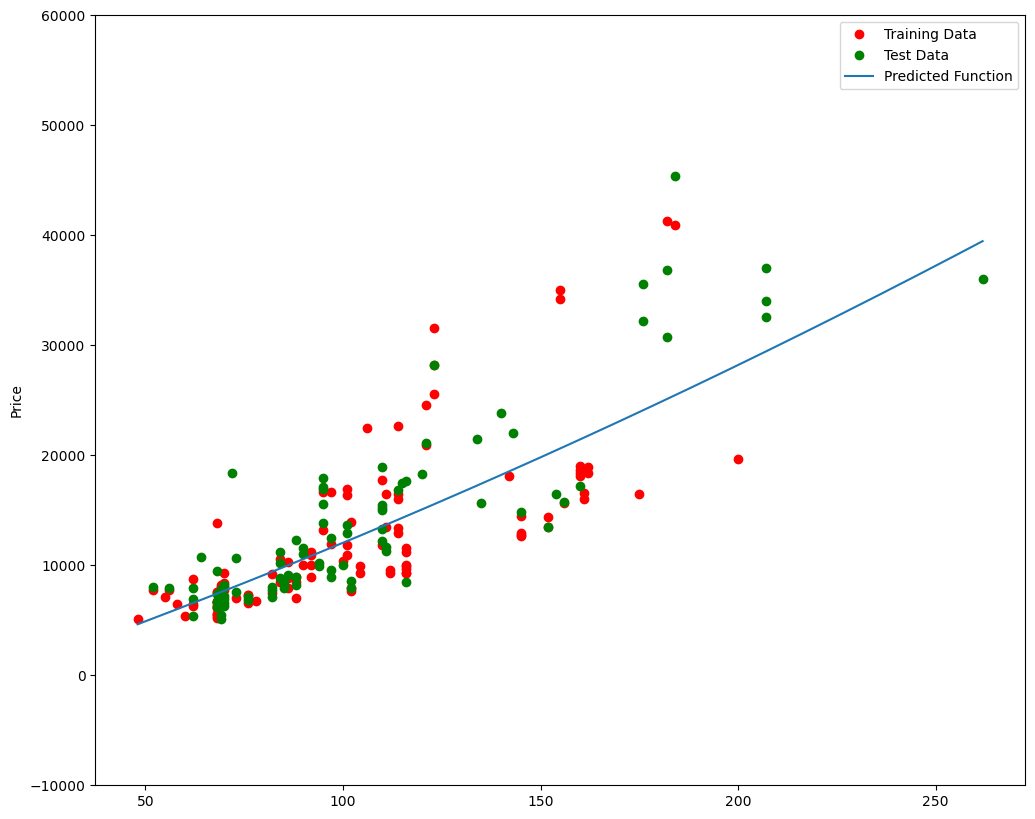

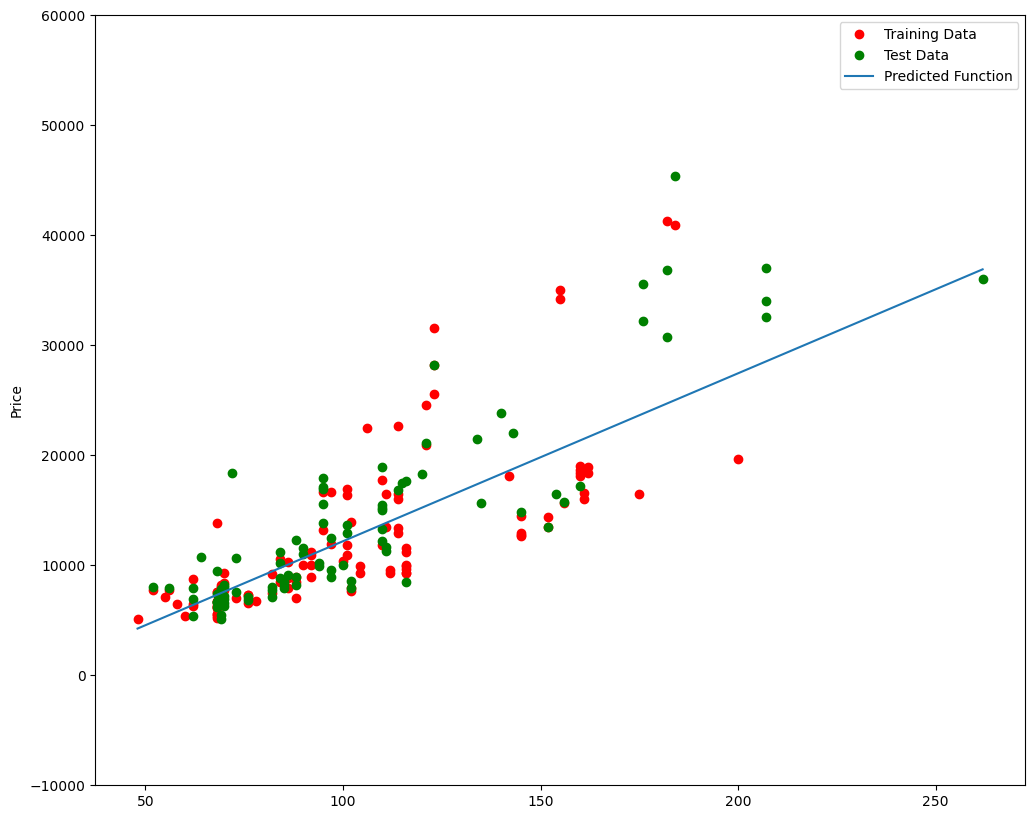

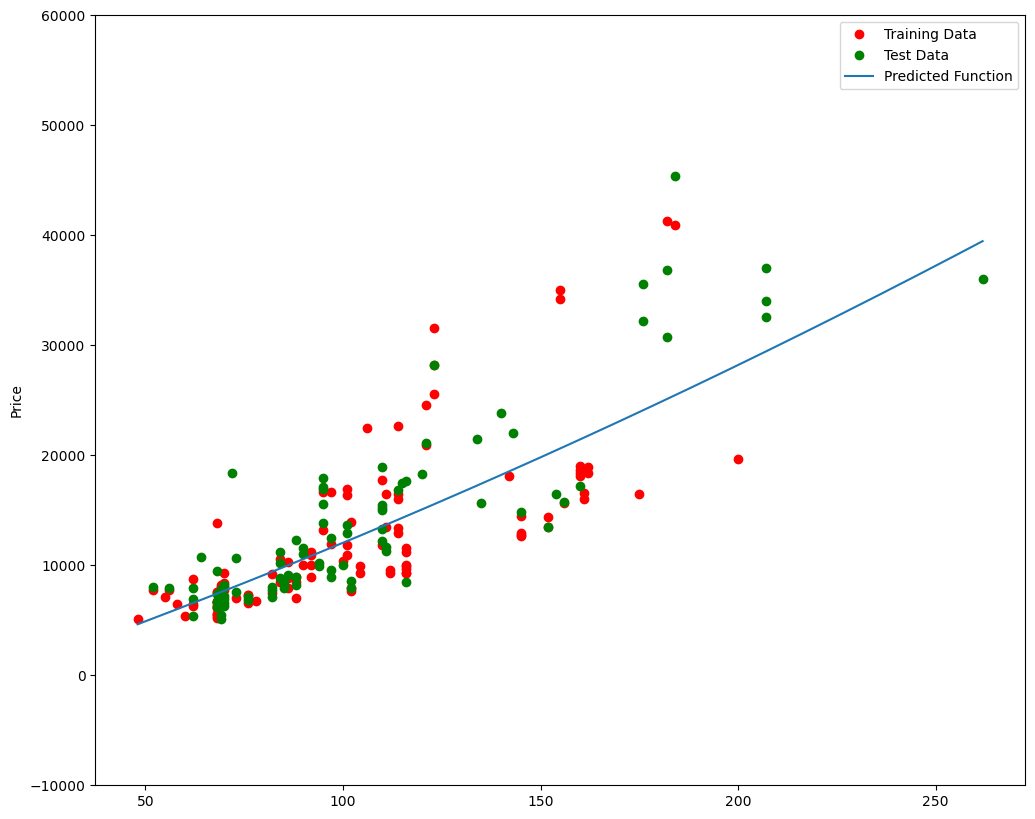

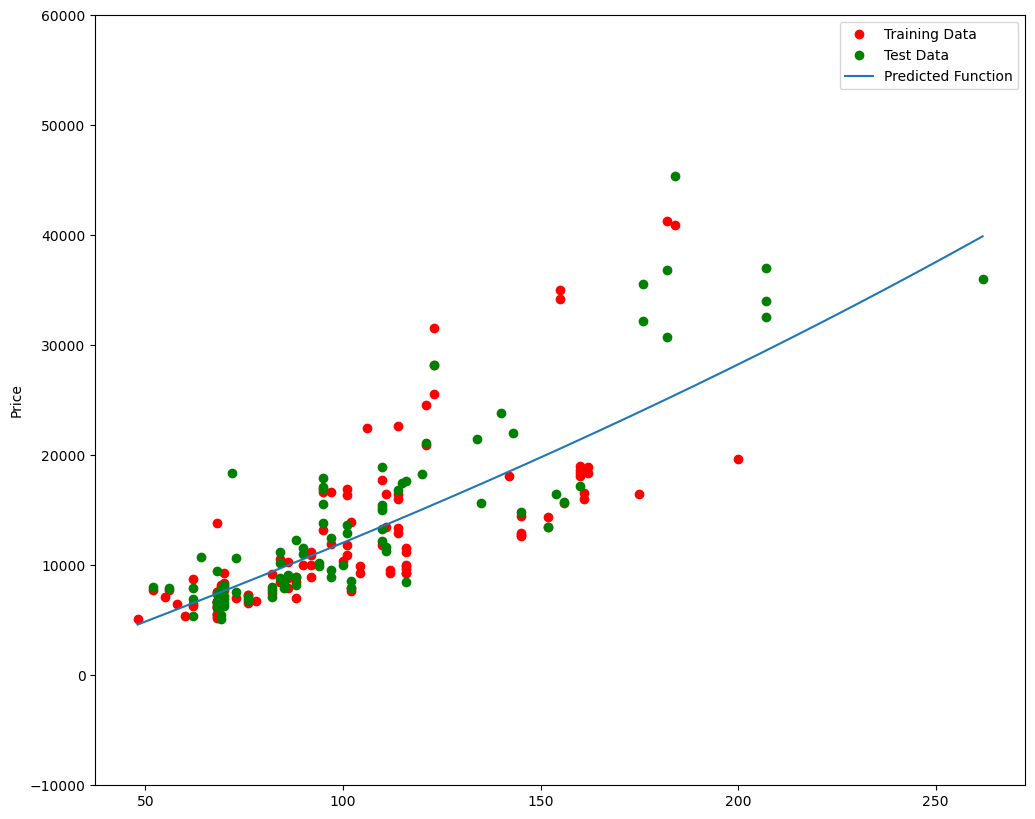

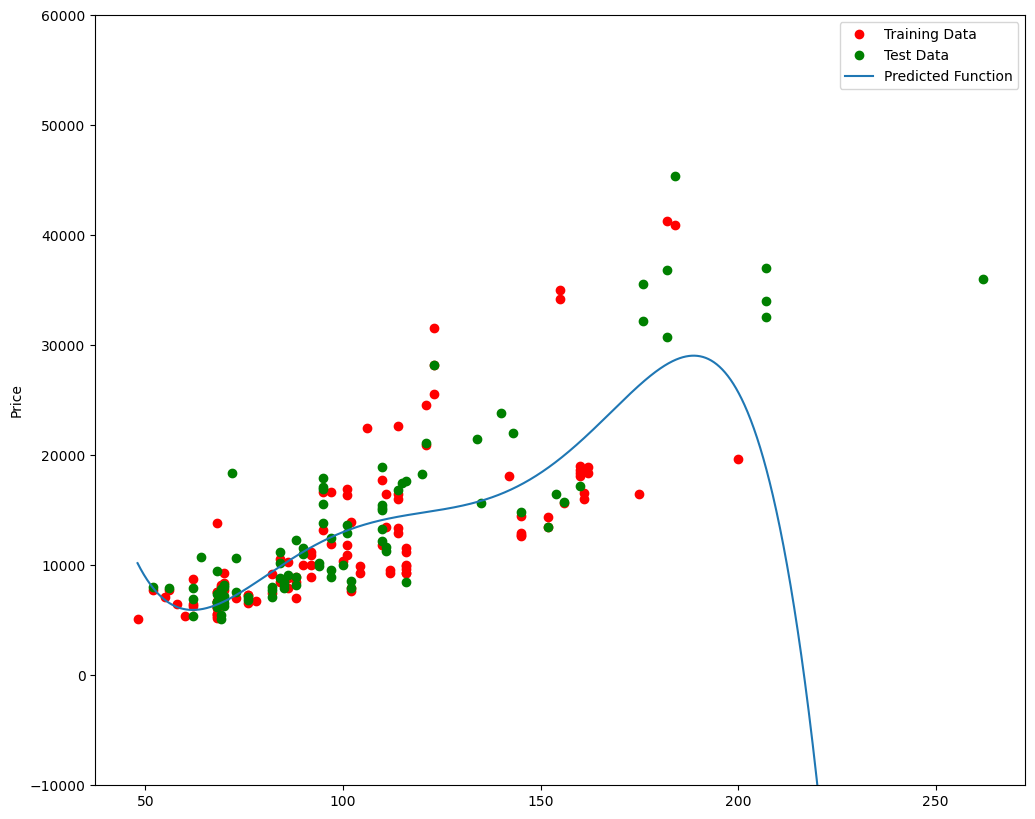

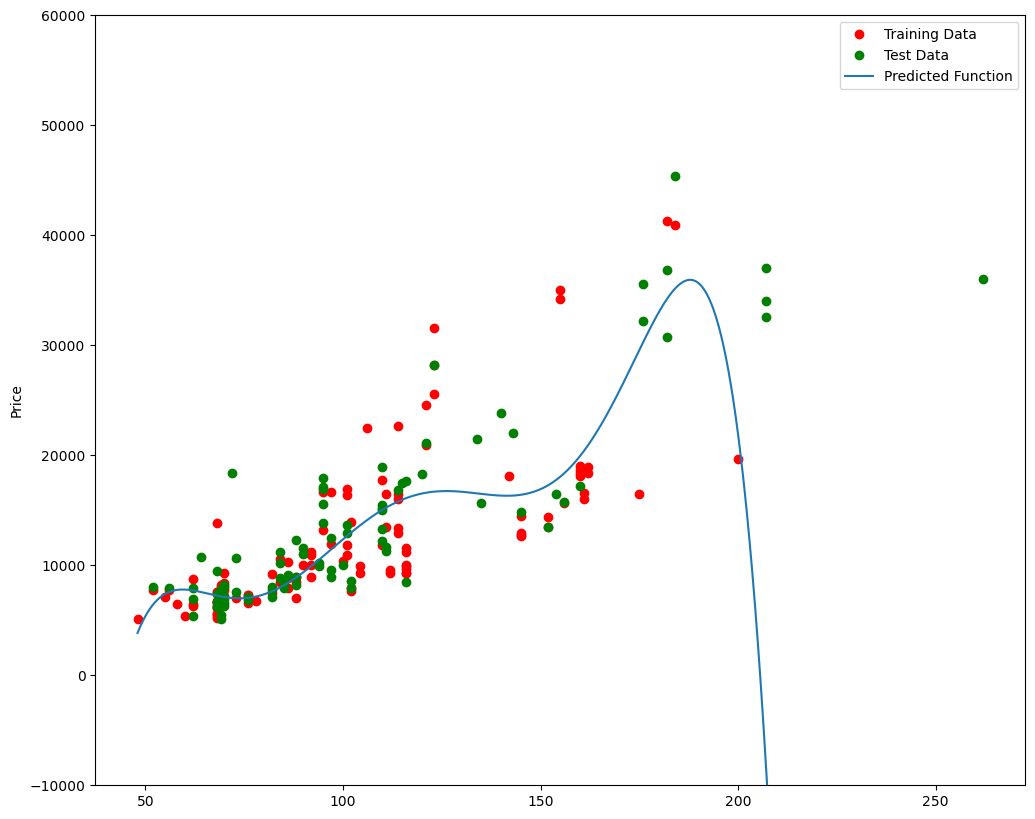

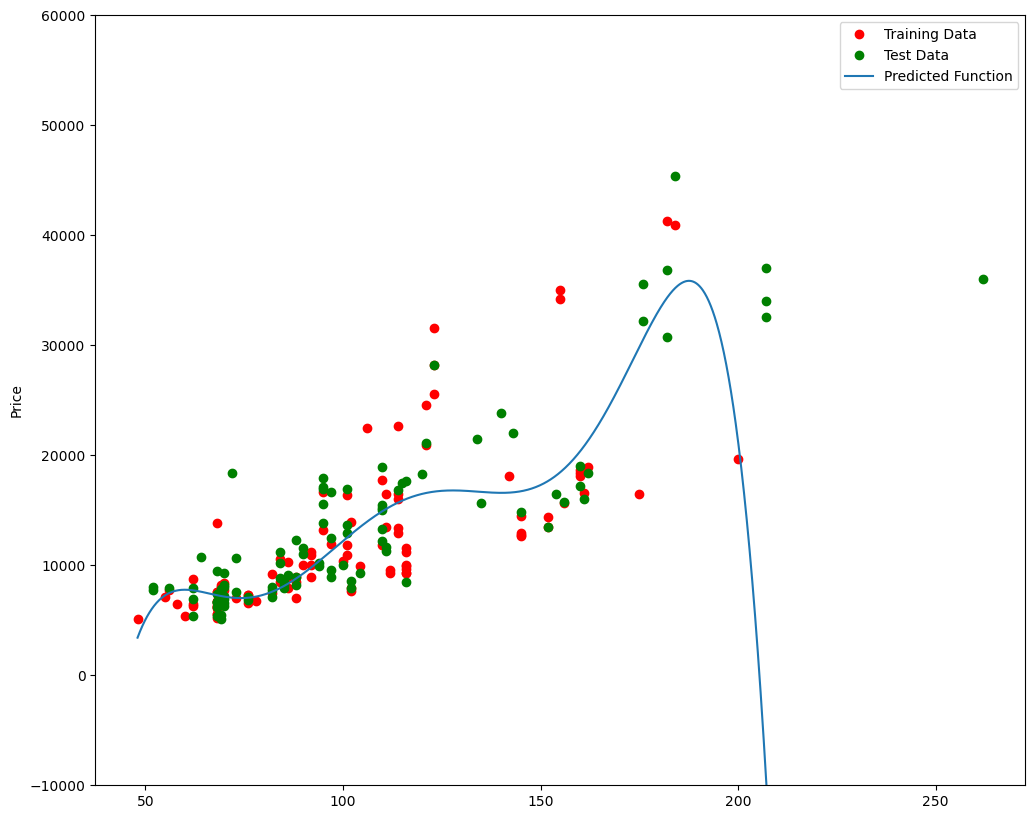

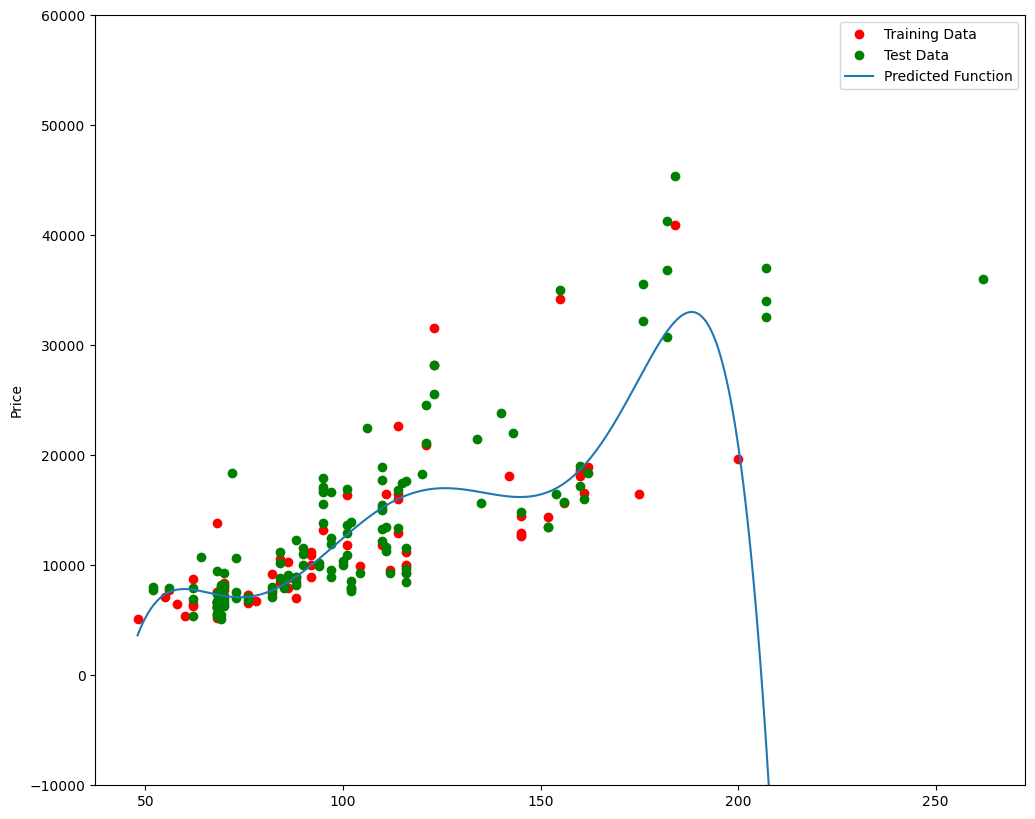

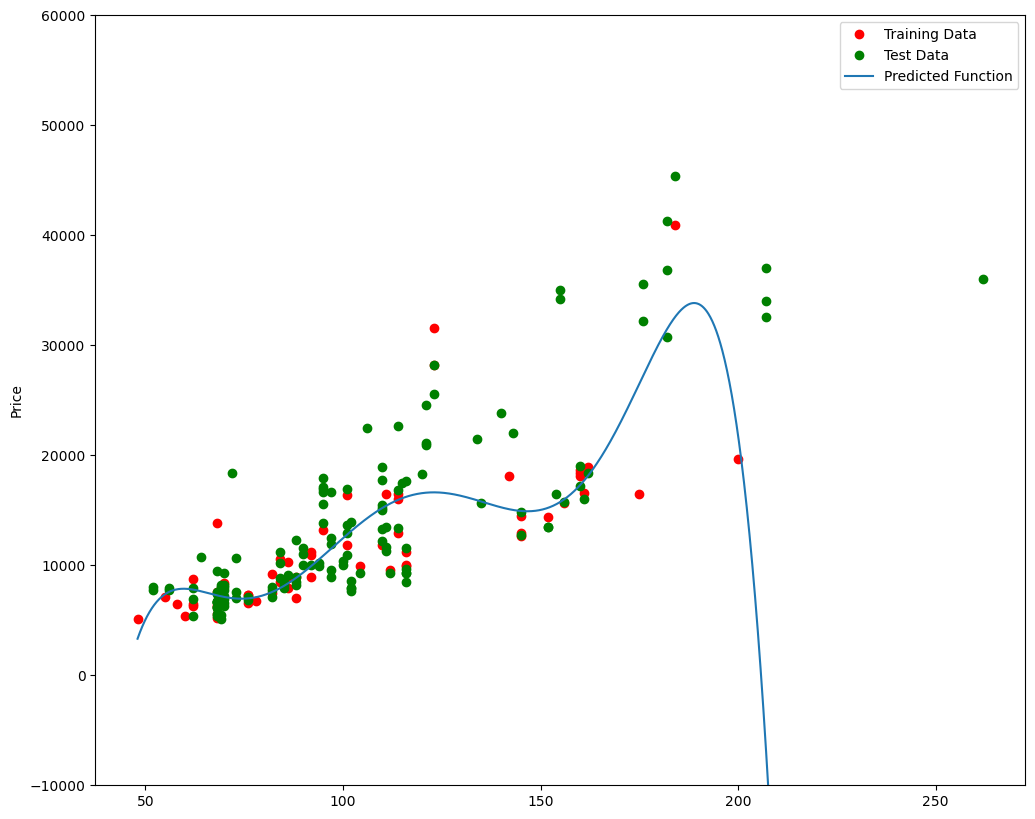

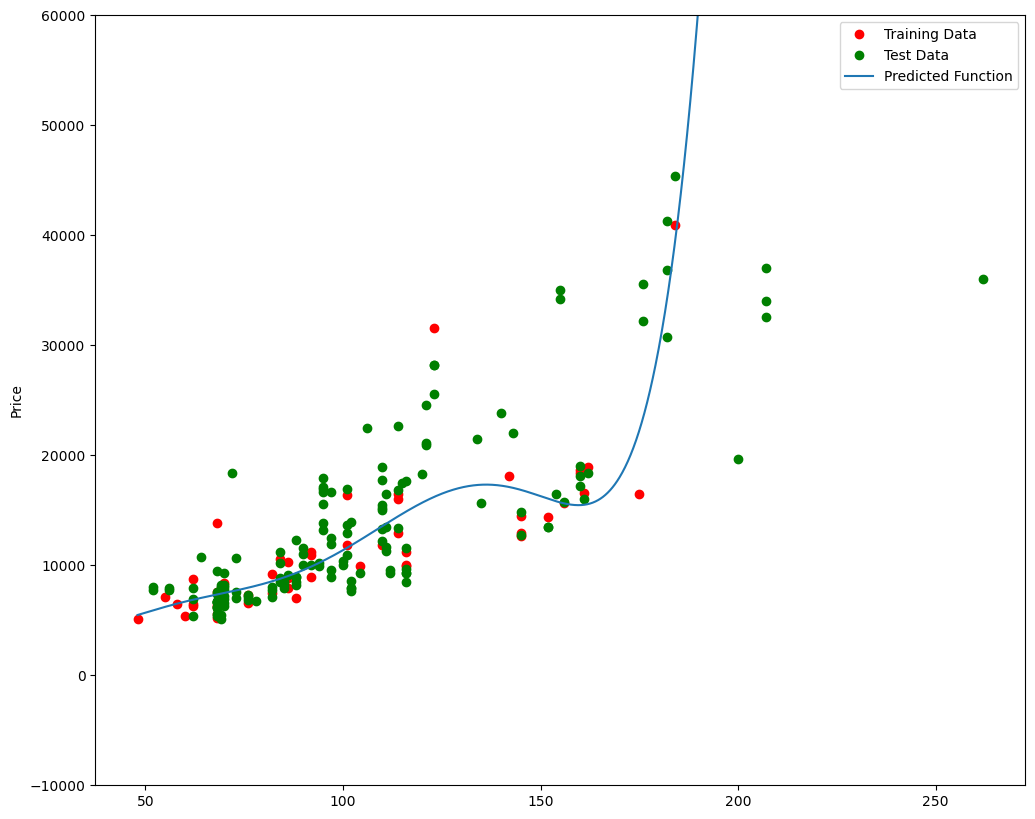

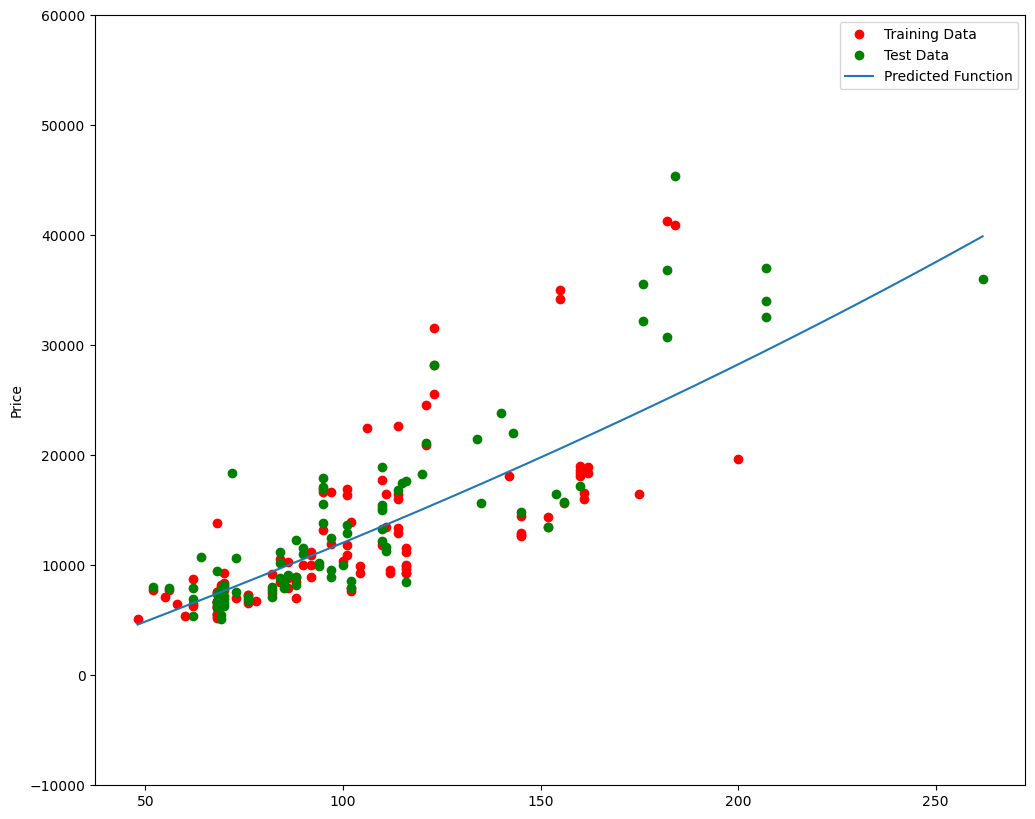

In [59]:
#below interface shows different polynomial orders and different amounts of data.
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

In [60]:
#Creating a PolynomialFeatures object "pr1" of degree two
pr1=PolynomialFeatures(degree=2)

In [64]:
#Transforming the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'.
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [65]:
x_train_pr1.shape

(110, 15)

In [63]:
#Creating a linear regression model "poly1" and training the object using method "fit" using the polynomial features
poly1=LinearRegression().fit(x_train_pr1,y_train)

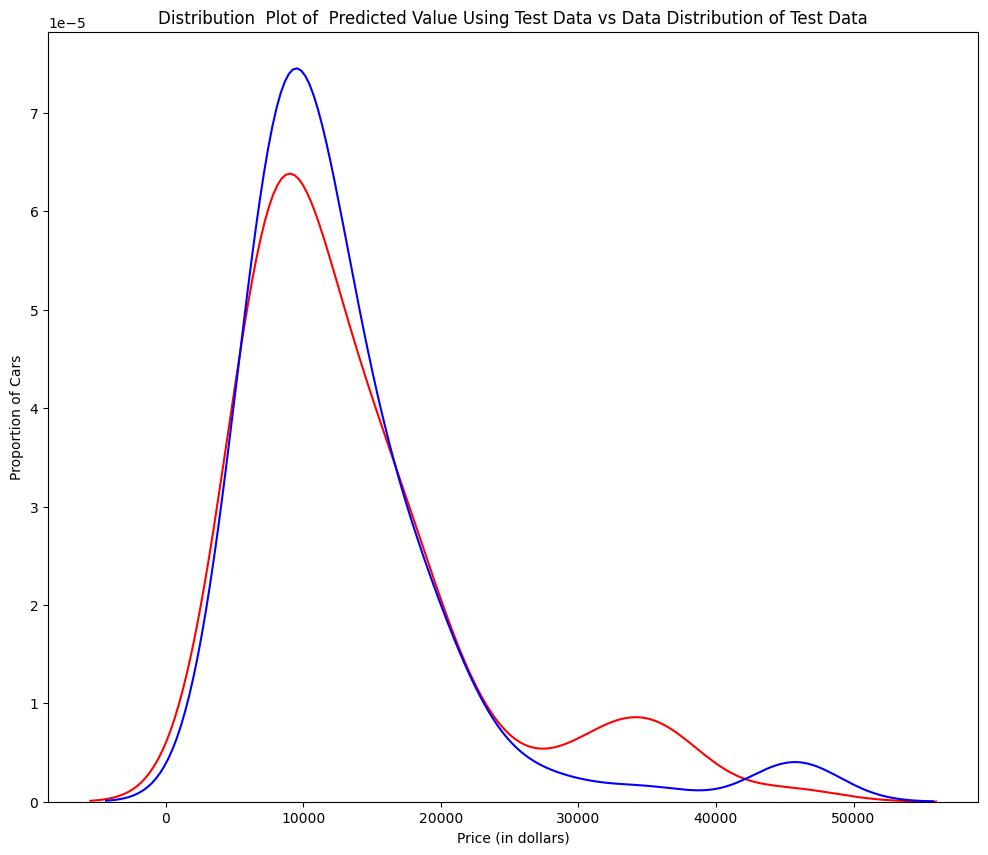

In [66]:
#Predicting an output on the polynomial features
#using function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.

yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

The predicted value is higher than actual value for cars where the price $ 10,000 range, conversely the predicted price is lower than the price cost in the $ 30,000 to $ 40,000 range. As such the model is not as accurate in these ranges.

<h2 id="ref3">Part 3: Ridge Regression</h2> 


In [67]:
#performing a degree two polynomial transformation
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [68]:
from sklearn.linear_model import Ridge

In [69]:
#creating a Ridge regression object, setting the regularization parameter (alpha) to 0.1
RigeModel=Ridge(alpha=1)

In [70]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [71]:
#prediction
yhat = RigeModel.predict(x_test_pr)

In [72]:
#comparing the first five predicted samples to test set
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322738 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [73]:
#selecting the value of alpha to minimize the test error. 

#Using progress bar to see how many iterations have been completed

from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:10<00:00, 97.16it/s, Test Score=0.564, Train Score=0.859]


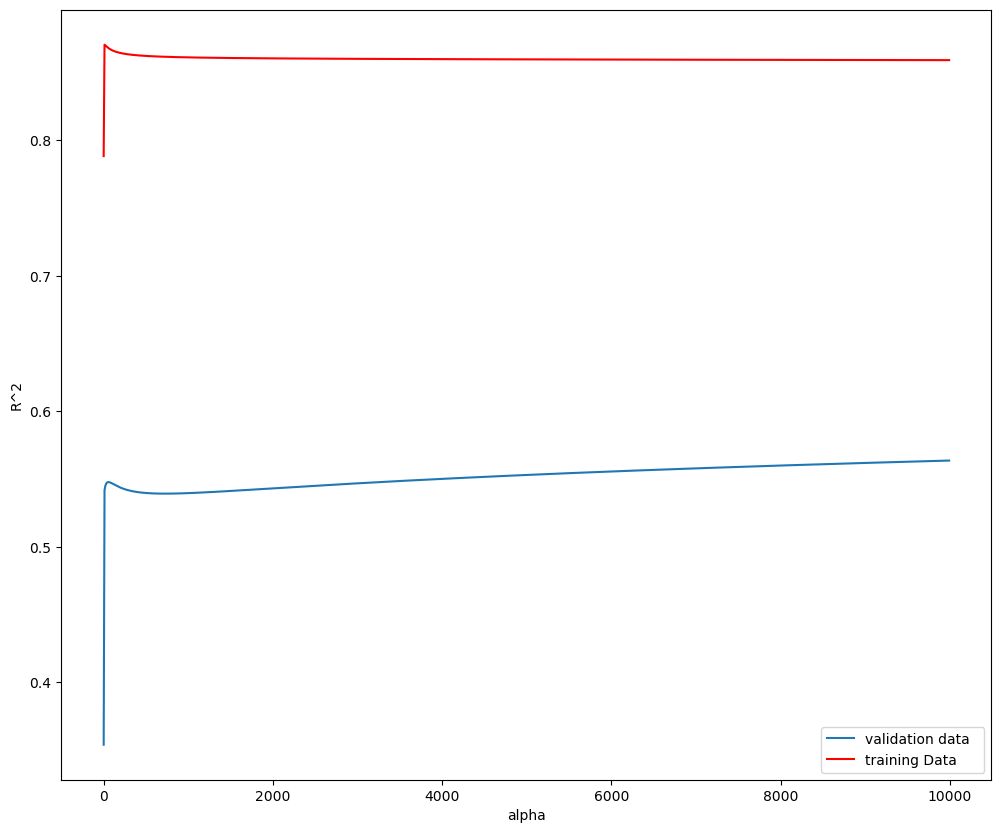

In [74]:
#plotting out the value of R^2 for different alphas

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


In [75]:
#Ridge regression, calculating the R^2 using the polynomial features,
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440208844

<details><summary>Click here for the solution</summary>

```python
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

```

</details>


<h2 id="ref4">Part 4: Grid Search</h2>


In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
#creating a dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [78]:
#Creating a Ridge regression object:
RR=Ridge()
RR

Ridge()

In [79]:
#Creating a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [80]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [81]:
#The object finds the best parameter values on the validation data. 
#The estimator can be obtained  with the best parameters and assign to the variable BestRR

BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [82]:
#testing model on the test data

BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

In [83]:
#Performing a grid search for the alpha parameter and the normalization parameter, and finding the best values of the parameters

parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)